## Regression analysis
### Unary linear regression analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data6.csv")
data.head(3)

,advertise_invest,sale_income
0,29,77
1,28,62
2,34,93


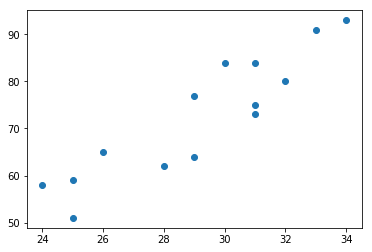

In [5]:
# check the possible relationship between advertise and income
plt.scatter(data.advertise_invest, data.sale_income)
plt.show() # it is alomost linear

In [6]:
# calculate the correlation coefficient
r = data.corr()
# r = np.corrcoef(data.advertise_invest, data.sale_income)
print(r) # there is strong correlation

                  advertise_invest  sale_income
advertise_invest          1.000000     0.906923
sale_income               0.906923     1.000000


In [7]:
# Get linear equation (calculate alpha and beta)
x = data.advertise_invest
y = data.sale_income
beta = ((x*y).sum() - len(data)*x.mean()*y.mean()) / ((x**2).sum() - len(data)*x.mean()**2);
alpha = y.mean() - beta*x.mean();

y2 = alpha + beta*x;

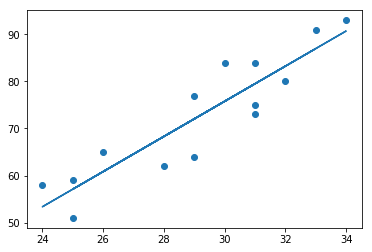

In [8]:
# plot linear equation
plt.scatter(x, y)
plt.plot(x, y2)
plt.show()

In [9]:
# check how linear equation fit actual y data
y.corr(y2)

0.9069229780508896

In [10]:
# calculate score which is used for checking whether the model is good or not
y.corr(y2)**2

0.8225092881166944

In [12]:
# predict income of invest [50, 40, 30] according to linear equation
alpha + beta*np.array([50, 40, 30])

array([150.53303965, 113.15418502,  75.7753304 ])

### Use python library to do regression analysis

In [13]:
from sklearn.linear_model import LinearRegression

In [40]:
# reshape data
x = np.array(data.advertise_invest).reshape(-1,1)
y = np.array(data.sale_income).reshape(-1,1)

In [41]:
# create linear model
lrModel = LinearRegression()
# train model with data
lrModel.fit(x, y)
# evaluate the model by score
lrModel.score(x, y)

0.8225092881166945

In [42]:
# predict income
invest = np.array([50, 40, 30]).reshape(-1,1)
lrModel.predict(invest)

array([[150.53303965],
       [113.15418502],
       [ 75.7753304 ]])

In [43]:
# get parameter of linear equation (alpha, beta)
alpha = lrModel.coef_
beta = lrModel.intercept_
print(alpha, beta)

[[3.73788546]] [-36.36123348]


### Univariate nonlinear regression analysis

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("data7.csv")
data.head()

,grade,resource
0,1,218
1,2,264
2,3,319
3,4,386
4,5,467


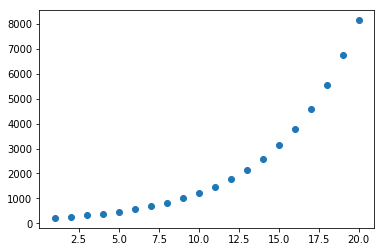

In [47]:
plt.scatter(data["grade"], data["resource"])
plt.show()

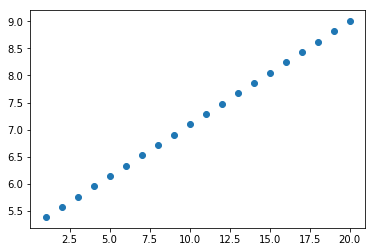

In [49]:
# change y with log
X = data["grade"]
Y = np.log(data["resource"])

plt.scatter(X, Y)
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
x = np.array(X).reshape(-1,1)
y = np.array(Y).reshape(-1,1)
lrModel.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# check score, which is used to evaluate model
lrModel.score(x, y) # it is a very good model, maximum of score is 1

0.999999908204925

In [68]:
# get parameter of linear model
a = lrModel.intercept_
b = lrModel.coef_
print(a, b)

[5.19382618] [[0.19057231]]


In [69]:
# because a and b is array, we only need the number
a = a[0]
b =b[0][0]

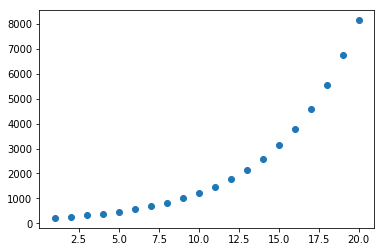

In [70]:
x = data.grade
y = np.exp(a)*(np.exp(b*x)) # calculate exponential of a and b*x

plt.scatter(x, y)
plt.show()

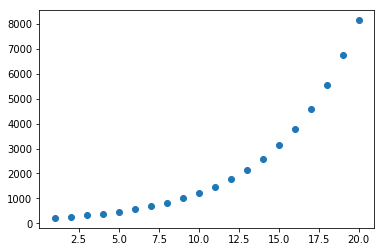

In [73]:
# method 2: use function in python library to fit data directly
from scipy.optimize import curve_fit
# definite a function
def Exp(x, a, b):
    return a*np.e**(b*x)

X = data.grade
Y = data.resource
# use data to fit our definite function Exp
popt, pcov = curve_fit(Exp, X, Y)
# parameter a and b is stored in 'popt'
# plot our curve model
plt.scatter(X, Exp(X, popt[0], popt[1]))
plt.show()

## Multiple Linear Regression Analysis

In [83]:
data = pd.read_csv("data8.csv")
data.head(3)

,店铺的面积,距离最近的车站,月营业额
0,10,80,469
1,8,0,366
2,8,200,371


In [84]:
# change columns name
data = data.rename(columns={"店铺的面积":"area","距离最近的车站":"distance","月营业额":"income"})

In [86]:
data.head(3)

,area,distance,income
0,10,80,469
1,8,0,366
2,8,200,371


In [87]:
x1 = data.area
x2 = data.distance
y = data.income

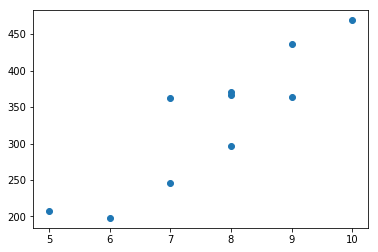

In [93]:
# check the correlation area and distance with income 
# correlation between area and income
plt.scatter(x1, y)
plt.show()

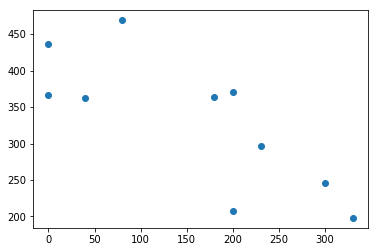

In [94]:
# correlation between distance and income
plt.scatter(x2, y)
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
X = data[["area", "distance"]]
Y = data[["income"]]

In [97]:
# create model
lrModel = LinearRegression()
# use data to train model
lrModel.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
# check model is good or not
lrModel.score(X, Y) # from result , it is a good model

0.9452358526817111

In [102]:
# use model to predict new data
lrModel.predict([[20, 5]])

array([[893.88906809]])

In [103]:
# get parameter of model
lrModel.coef_ # beacause we have two factors

array([[41.51347826, -0.34088269]])

In [104]:
# get intercept
lrModel.intercept_

array([65.32391639])